In [1]:
import pandas as pd

wine_df = pd.read_csv("data/wine/wine.data", header=None)
wine_df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 
                   'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 
                   'Hue', 'OD280/OD315 of diluted wines', 'Proline']

wine_df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
from sklearn.model_selection import train_test_split

X, y = wine_df.iloc[:, 1:].values, wine_df.iloc[:, 0].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train) 
X_test_std = sc.transform(X_test)

In [4]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=2) 
X_train_pca = pca.fit_transform(X_train_std) 
X_test_pca = pca.transform(X_test_std)

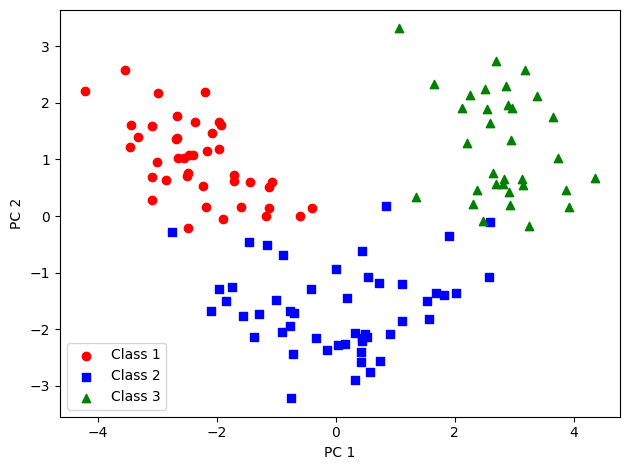

In [5]:
import matplotlib.pyplot as plt
import numpy as np

colors = ['r', 'b', 'g'] 
markers = ['o', 's', '^']

for l, c, m in zip(np.unique(y_train), colors, markers): 
    plt.scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1], 
                c=c, label=f'Class {l}', marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left') 
plt.tight_layout() 
plt.show()

In [6]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 绘制决策超平面
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # 绘制样本
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=colors[idx], marker=markers[idx], 
                    label=f'Class {cl}', edgecolor='black')
        
        # 高亮测试样本
        if test_idx:
            # plot all examples
            X_test, y_test = X[test_idx, :], y[test_idx]
            
            plt.scatter(X_test[:, 0], X_test[:, 1], c='none', 
                        edgecolor='black', alpha=1.0, linewidth=1, 
                        marker='o', s=100, label='Test set')

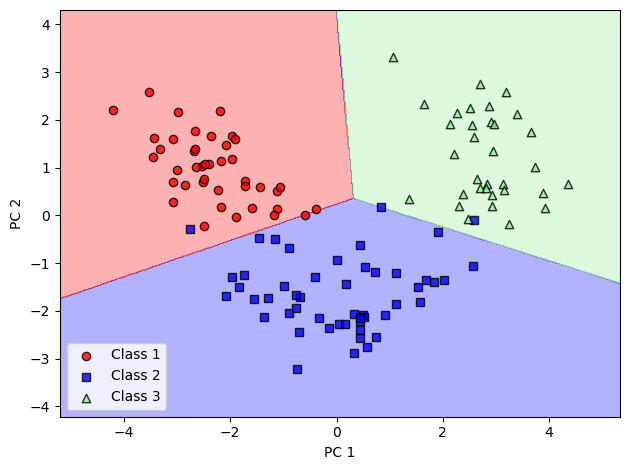

In [7]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr.fit(X_train_pca, y_train)

plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2') 
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

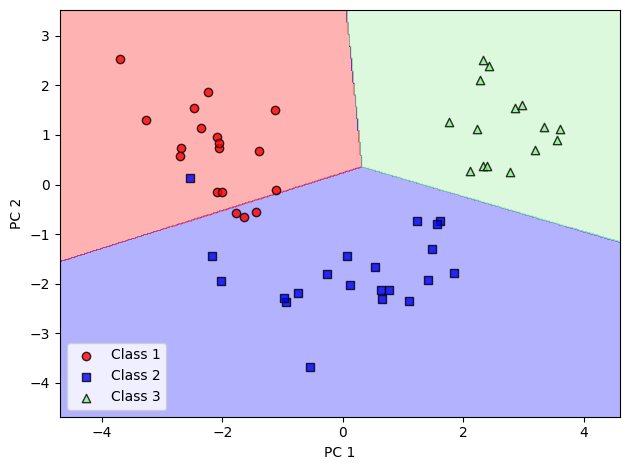

In [8]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2') 
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

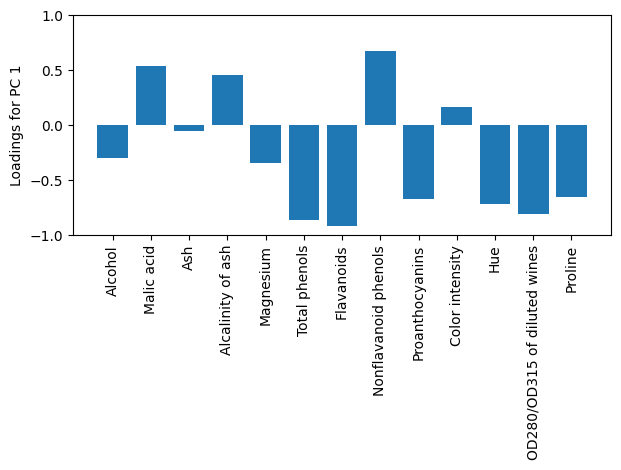

In [9]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig, ax = plt.subplots()
ax.bar(range(13), loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(13)) 
ax.set_xticklabels(wine_df.columns[1:], rotation=90)
plt.ylim([-1, 1]) 
plt.tight_layout() 
plt.show()

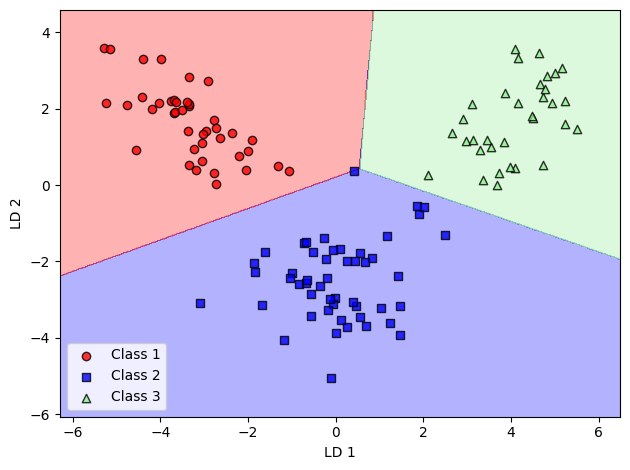

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_lda, y_train)

plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1') 
plt.ylabel('LD 2') 
plt.legend(loc='lower left') 
plt.tight_layout() 
plt.show()

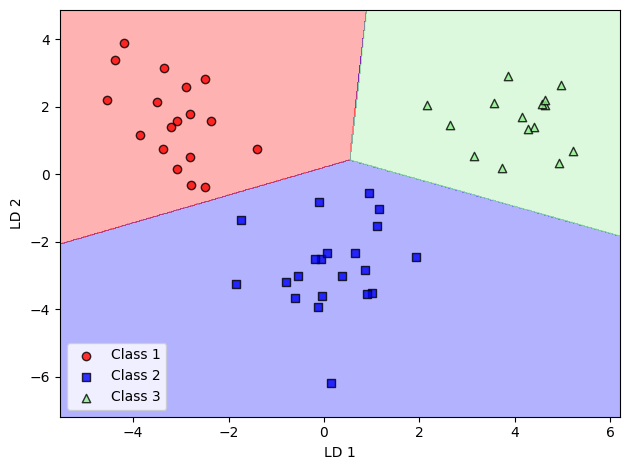

In [13]:
X_test_lda = lda.transform(X_test_std)

plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1') 
plt.ylabel('LD 2') 
plt.legend(loc='lower left') 
plt.tight_layout() 
plt.show()